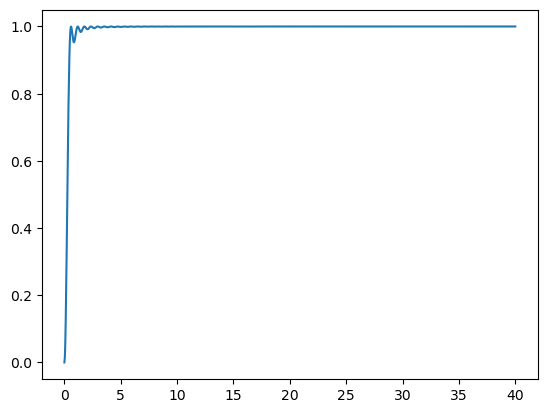

In [1]:
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0.0001, 40, 1001)
gr_fermonic = 1 - np.sin(3*np.pi**0.5*r)**2/(3*np.pi**0.5*r)**2
plt.plot(r, gr_fermonic)

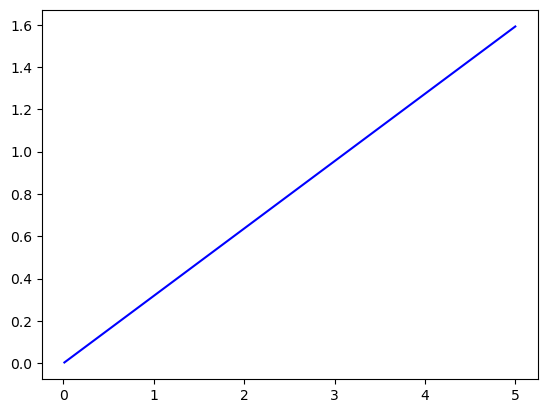

In [15]:
from scipy.special import j1
def true_sk(k_values):
    return (2/np.pi**0.5)/(2*np.pi**0.5)*k_values
k_values = np.linspace(0.01,5, 1001)
sk = true_sk(k_values)
plt.plot(k_values, sk, color='blue')

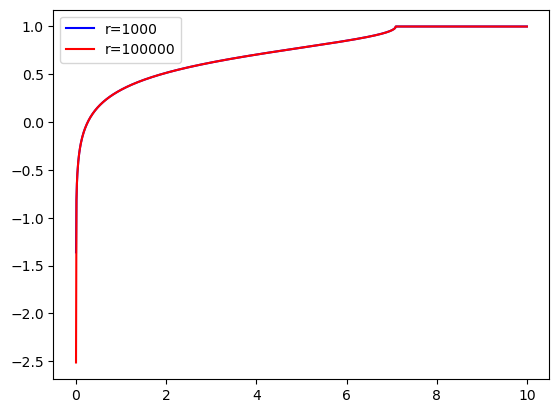

In [5]:
from scipy.special import j0
from scipy.integrate import simpson

def hankel_transform_2d(gr, r, k_values):
    hk = np.zeros(len(k_values))
    delta_r = np.diff(r)[0]
    for i in range(len(k_values)):
        integrand = r*(gr-1)*j0(k_values[i]*r)
        hk[i] = 2*np.pi*simpson(integrand, x = r, dx=delta_r)
    return 1+hk

r = np.linspace(0.0001, 1000, 100001)
gr_fermonic = 1 - np.sin(2*np.pi**0.5*r)**2/(2*np.pi**0.5*r)**2
k_values = np.linspace(0, 10, 1001)
sk1 = hankel_transform_2d(gr_fermonic, r, k_values)
plt.plot(k_values, sk1, label="r=1000", color='blue')

r = np.linspace(0.0001, 100000, 1000001)
k_values = np.linspace(0, 10, 1001)
gr_fermonic = 1 - np.sin(2*np.pi**0.5*r)**2/(2*np.pi**0.5*r)**2
sk2 = hankel_transform_2d(gr_fermonic, r, k_values)
plt.plot(k_values, sk2, label="r=100000", color='red')

plt.legend()

In [6]:
print(k_values[sk1<1e-5])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25]


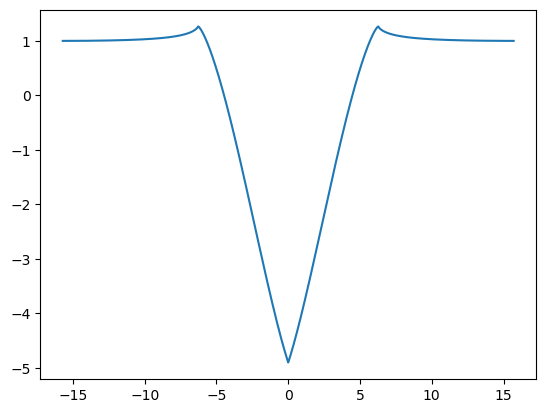

In [49]:
def Fourier_transform_2d(gr):
    # Subtract 1 to obtain h(r) from g(r)
    hr = gr - 1
    h_r_neg = hr[::-1]      # Mirror the h(r) data

    h_r_full = np.concatenate((h_r_neg, hr))

    # Compute the 1D Fourier transform
    hk = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(h_r_full)))

    Sk = 1 + np.real(hk)

    return Sk

r = np.linspace(0.01, 200000, 1000001)
gr_fermonic = 1 - np.sin(np.pi*r)**2/(np.pi*r)**2
# Calculate wavevector values k based on Fourier modes
r_neg = -r[::-1]         # Negative radial coordinates
r_full = np.concatenate((r_neg, r))
N = len(r_full)
k_values = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=(r[1] - r[0])))
sk = Fourier_transform_2d(gr_fermonic)
plt.plot(k_values, sk)